In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorfl
ow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from keras.optimizers import *

In [143]:
import cv2
path=r'C:\Users\leepa\Downloads\leedsbutterfly\images'
file=os.listdir(path)
img=[] #to store images
spec=[] #to store labels
for i in file:
    label=int(i[:3]) #extracting labels from the image
    spec.append(label)
    img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(256,256))
    img.append(img_array)


In [30]:
dict={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [31]:
species=[]
for i in spec:
    new_label=dict['00'+str(i)]
    species.append(new_label)
print(species[107:114])    

['Heliconius_charitonius', 'Heliconius_charitonius', 'Heliconius_charitonius', 'Heliconius_charitonius', 'Heliconius_charitonius', 'Heliconius_charitonius', 'Heliconius_charitonius']


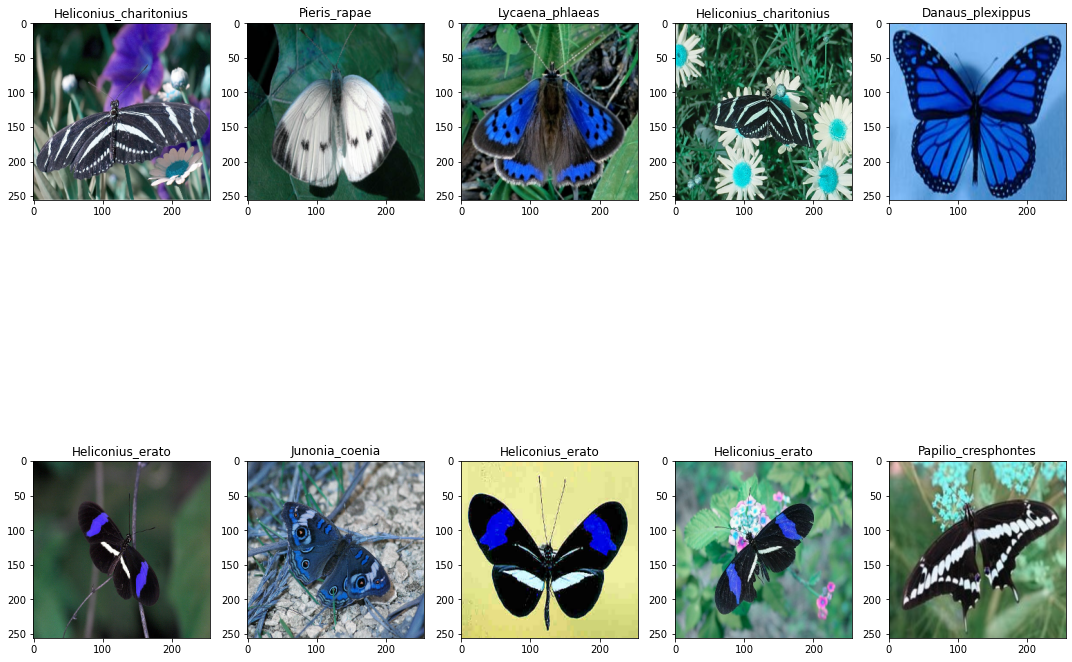

In [32]:
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (5):
        l=np.random.randint(0,len(spec))
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(str(species[l]))
plt.tight_layout()

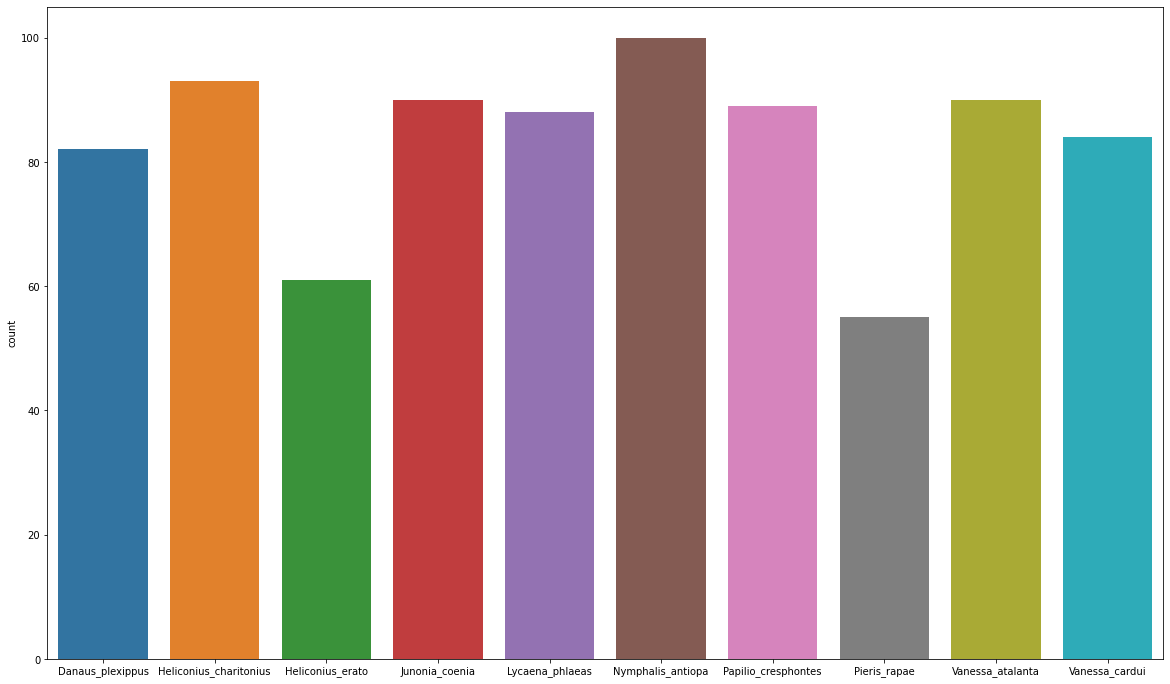

In [33]:
plt.figure(figsize=(20,12))
sns.countplot(x=species,)
plt.show()

In [34]:
img=np.array(img)

In [35]:
img.mean()

104.49239609180353

In [36]:
img=img/104

In [37]:
img=img.reshape(-1,256,256,3)

In [38]:
le=LabelEncoder()
y=le.fit_transform(species)

In [39]:
y=to_categorical(y)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(img,y,random_state=11,test_size=0.2)

In [55]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(516, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [56]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [57]:
%%time
m=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)

Epoch 1/20
45/45 [==============================] - 22s 466ms/step - loss: 2.2876 - accuracy: 0.1109 - val_loss: 2.2891 - val_accuracy: 0.1353
Epoch 2/20
45/45 [==============================] - 21s 468ms/step - loss: 1.9943 - accuracy: 0.2462 - val_loss: 1.7583 - val_accuracy: 0.3083
Epoch 3/20
45/45 [==============================] - 21s 469ms/step - loss: 1.4222 - accuracy: 0.4680 - val_loss: 1.1579 - val_accuracy: 0.5338
Epoch 4/20
45/45 [==============================] - 21s 467ms/step - loss: 1.0546 - accuracy: 0.6429 - val_loss: 1.0541 - val_accuracy: 0.6165
Epoch 5/20
45/45 [==============================] - 21s 477ms/step - loss: 0.7837 - accuracy: 0.7293 - val_loss: 1.1842 - val_accuracy: 0.6316
Epoch 6/20
45/45 [==============================] - 24s 531ms/step - loss: 0.6816 - accuracy: 0.7331 - val_loss: 0.9317 - val_accuracy: 0.7218
Epoch 7/20
45/45 [==============================] - 24s 544ms/step - loss: 0.5108 - accuracy: 0.8308 - val_loss: 0.9993 - val_accuracy: 0.7143

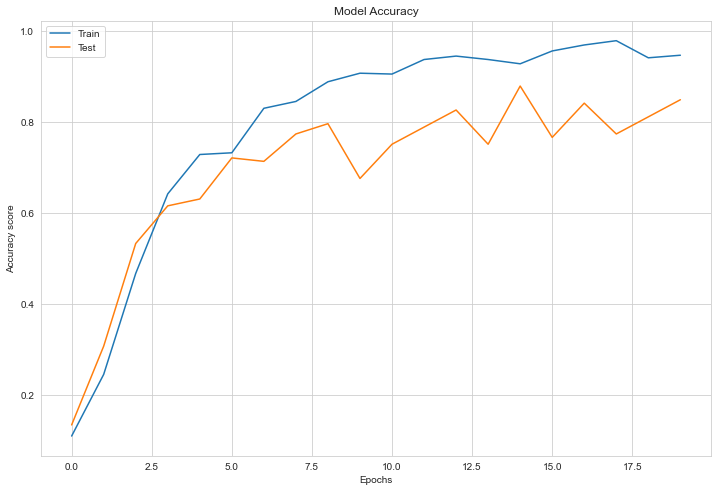

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

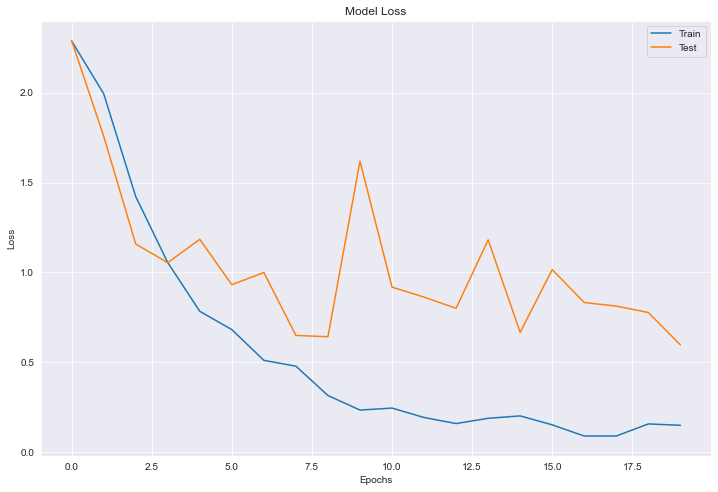

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Test'])
plt.show()

In [62]:
preds=model.predict(x_test)

In [63]:
predictions=np.argmax(preds,axis=1)

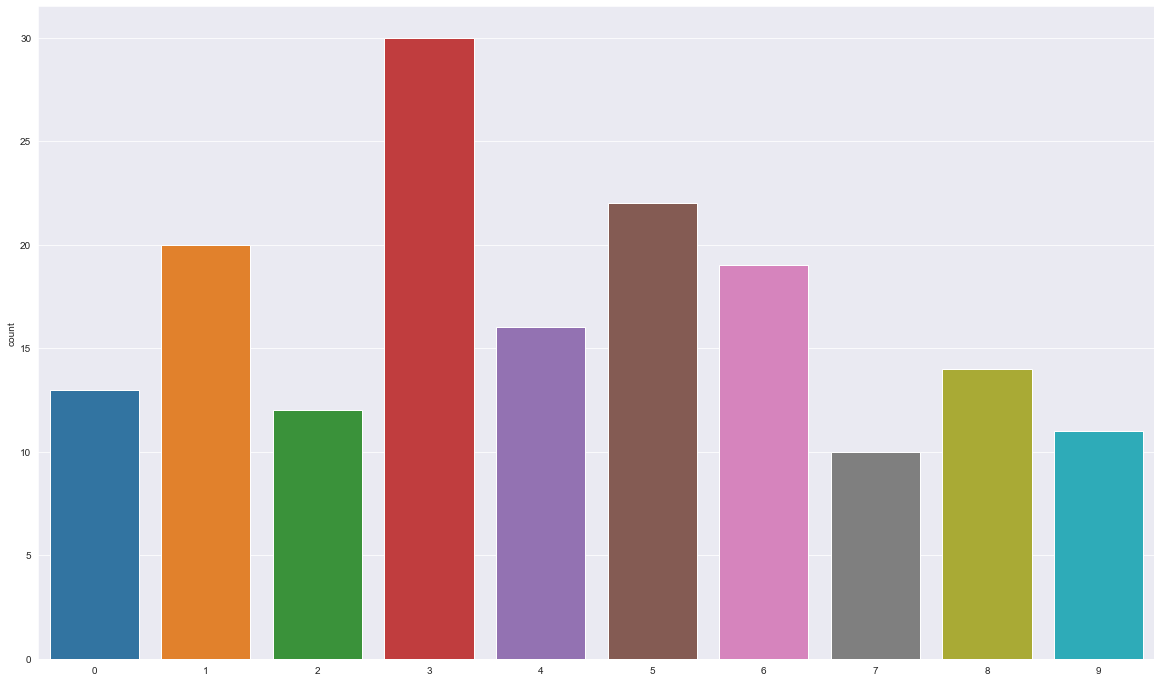

In [93]:
plt.figure(figsize=(20,12))
sns.countplot(x=predictions)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(158, 319, 3)
(256, 256, 3)
(1, 256, 256, 3)


'Danaus_plexippus'

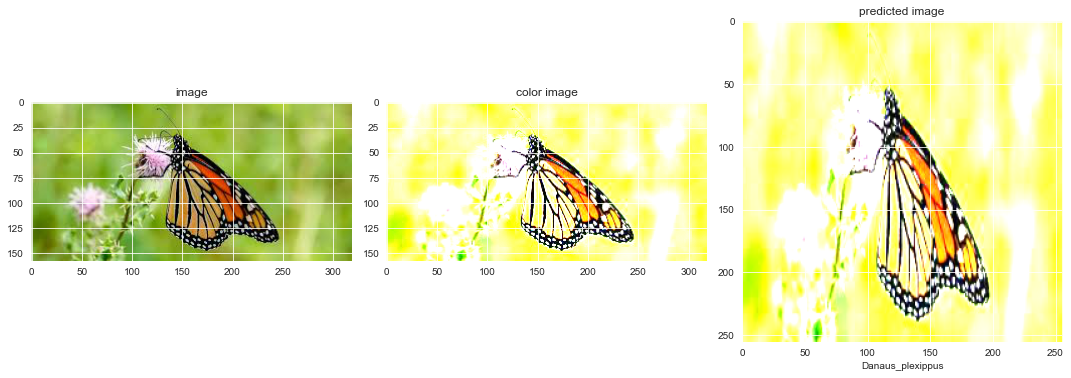

In [88]:
predict('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-CUJK5ImQKy0nSF-0x_ClV8VEmh1v7PoTmg&usqp=CAU')

In [100]:
from keras.applications.vgg16 import VGG16


In [101]:
import tensorflow as tf

In [104]:
vgg=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',pooling='avg')

In [105]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [106]:
model2=Sequential([
    vgg,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [107]:
model2.layers[0].trainable = False
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [108]:
m2=model2.fit(x_train,y_train,batch_size=12, epochs=1,validation_split=0.3)

39/39 [==============================] - 97s 2s/step - loss: 2.3203 - acc: 0.1742 - val_loss: 2.1034 - val_acc: 0.2200


In [109]:
im2=[]
for i in file:
    label=int(i[:3]) #extracting labels from the image
    spec.append(label)
    img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(224,224))
    im2.append(img_array)


In [110]:
im2=np.array(im2)

In [111]:
im2.mean()

104.486015731037

In [112]:
im2=im2/104

In [113]:
im2.shape

(832, 224, 224, 3)

In [114]:
im2=im2.reshape(-1,224,224,3)

In [115]:
x_train,x_test,y_train,y_test=train_test_split(img,y,random_state=11,test_size=0.2)

In [116]:
m2=model2.fit(x_train,y_train,batch_size=12, epochs=20,validation_split=0.3)

Epoch 1/20
39/39 [==============================] - 90s 2s/step - loss: 2.0349 - acc: 0.3161 - val_loss: 1.8652 - val_acc: 0.5550
Epoch 2/20
39/39 [==============================] - 96s 2s/step - loss: 1.7759 - acc: 0.5054 - val_loss: 1.6461 - val_acc: 0.7900
Epoch 3/20
39/39 [==============================] - 96s 2s/step - loss: 1.5921 - acc: 0.6516 - val_loss: 1.4763 - val_acc: 0.8200
Epoch 4/20
39/39 [==============================] - 97s 3s/step - loss: 1.3908 - acc: 0.7183 - val_loss: 1.3093 - val_acc: 0.8850
Epoch 5/20
39/39 [==============================] - 97s 3s/step - loss: 1.2559 - acc: 0.8043 - val_loss: 1.1891 - val_acc: 0.9050
Epoch 6/20
39/39 [==============================] - 96s 2s/step - loss: 1.1227 - acc: 0.8538 - val_loss: 1.0729 - val_acc: 0.9250
Epoch 7/20
39/39 [==============================] - 96s 2s/step - loss: 1.0289 - acc: 0.8624 - val_loss: 0.9756 - val_acc: 0.9250
Epoch 8/20
39/39 [==============================] - 96s 2s/step - loss: 0.9409 - acc: 0.89

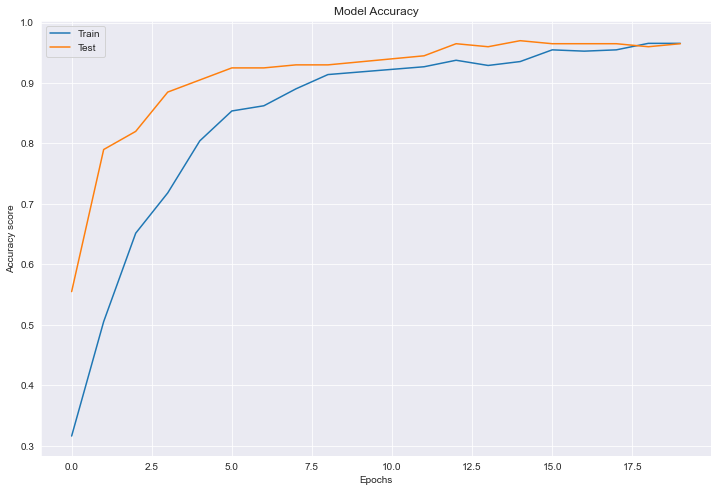

In [118]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m2.history['acc'])
plt.plot(m2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

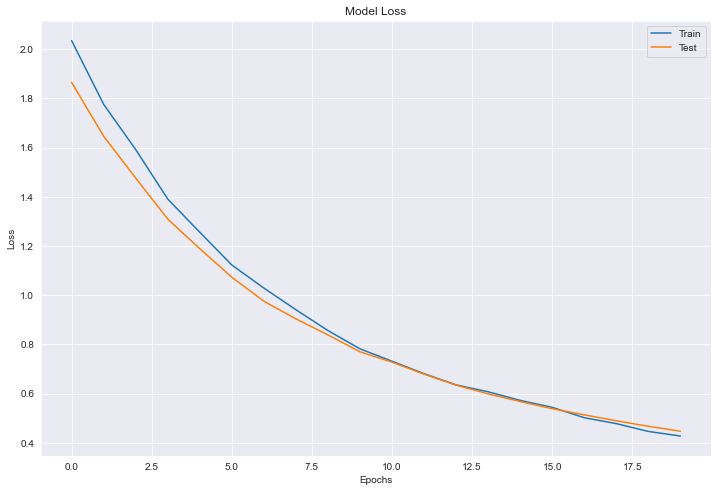

In [119]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Test'])

In [120]:
preds2=model2.predict(x_test)

In [121]:
predictions2=np.argmax(preds2,axis=1)

In [122]:
predictions2

array([3, 3, 0, 8, 9, 7, 4, 5, 3, 6, 7, 6, 5, 5, 3, 1, 6, 3, 9, 1, 2, 1,
       2, 5, 0, 3, 0, 5, 1, 1, 7, 2, 3, 3, 6, 9, 9, 6, 3, 6, 8, 0, 8, 1,
       3, 9, 9, 8, 9, 4, 6, 2, 1, 6, 1, 9, 7, 8, 4, 3, 6, 6, 1, 0, 3, 4,
       6, 3, 7, 2, 5, 6, 7, 3, 1, 5, 6, 1, 9, 9, 8, 3, 1, 6, 4, 1, 6, 8,
       8, 9, 4, 5, 4, 7, 1, 2, 4, 9, 0, 2, 1, 9, 5, 3, 1, 4, 1, 8, 4, 6,
       1, 0, 3, 0, 5, 5, 5, 7, 4, 6, 5, 0, 8, 4, 7, 2, 9, 6, 9, 3, 2, 9,
       4, 6, 3, 2, 3, 3, 3, 5, 3, 6, 0, 7, 1, 6, 5, 3, 2, 7, 3, 9, 4, 0,
       3, 2, 1, 6, 4, 0, 3, 5, 1, 5, 2, 6, 8], dtype=int64)

In [123]:
predictions

array([3, 3, 0, 3, 3, 4, 3, 5, 8, 6, 7, 6, 5, 5, 3, 1, 6, 3, 3, 1, 2, 1,
       2, 5, 9, 4, 0, 5, 1, 1, 4, 2, 4, 3, 6, 3, 9, 6, 7, 6, 8, 0, 8, 1,
       3, 9, 0, 8, 9, 4, 1, 5, 1, 2, 1, 0, 7, 8, 3, 5, 6, 6, 4, 0, 3, 4,
       6, 8, 7, 2, 5, 6, 4, 3, 1, 5, 6, 1, 3, 9, 8, 3, 1, 1, 4, 1, 6, 8,
       8, 9, 4, 8, 5, 7, 5, 2, 3, 9, 0, 2, 1, 9, 5, 3, 1, 4, 4, 8, 5, 1,
       7, 0, 3, 0, 5, 5, 5, 7, 4, 6, 5, 0, 8, 8, 7, 2, 9, 6, 3, 3, 2, 9,
       5, 6, 3, 2, 3, 4, 3, 5, 3, 6, 0, 7, 1, 6, 5, 3, 2, 7, 5, 9, 3, 0,
       3, 4, 1, 6, 4, 0, 3, 5, 1, 3, 2, 6, 8], dtype=int64)

In [124]:
import requests # for generating http requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/104.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(224,224))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    print(img.shape)
    return img

In [126]:
def predict(url):
    img=process_image(url)
    label=model2.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(species[final_1])
    return species[final_1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(437, 437, 3)
(224, 224, 3)
(1, 224, 224, 3)


'Danaus_plexippus'

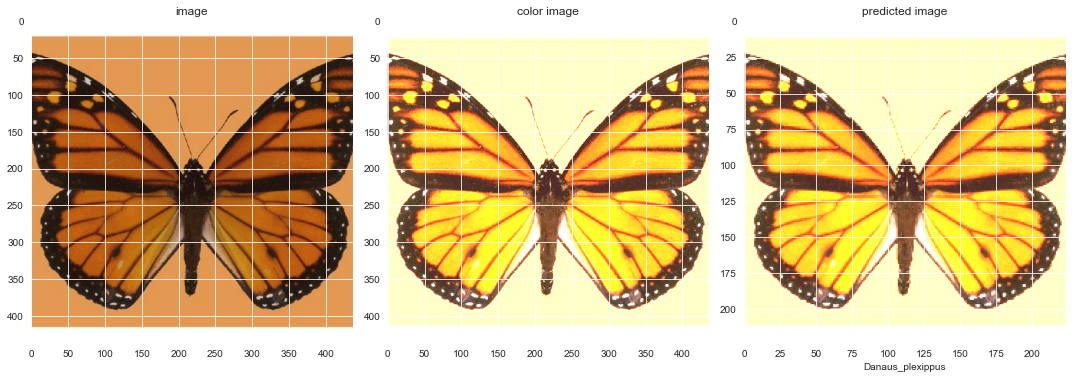

In [142]:
predict('https://www.researchgate.net/publication/284095977/figure/fig1/AS:324583526813699@1454398151635/a-Male-monarch-butterfly-Danaus-plexippus-b-Monarch-with-individual-body-parts_Q640.jpg')